In [20]:
import pandas as pd 
import os 
import heartpy as hp
import matplotlib.pyplot as plt
data_dir= "./pulse-transit-time/pulse-transit-time-ppg/1.1.0/csv"

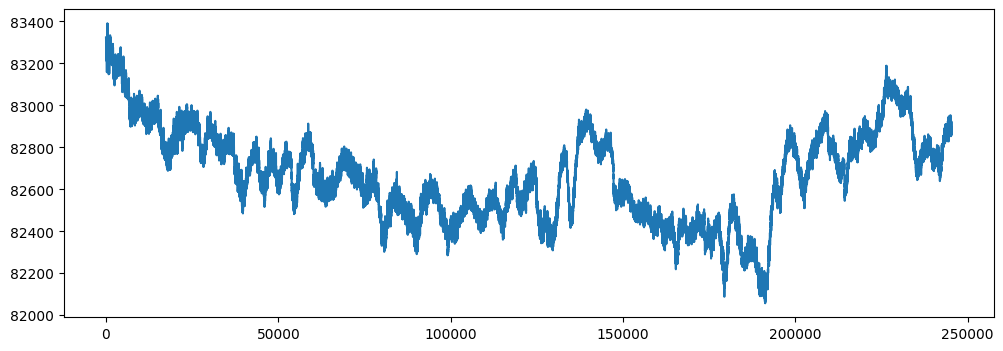

In [21]:
s1_sit_dataset= pd.read_csv(data_dir+"/s1_run.csv")
data = s1_sit_dataset['pleth_1'].values
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

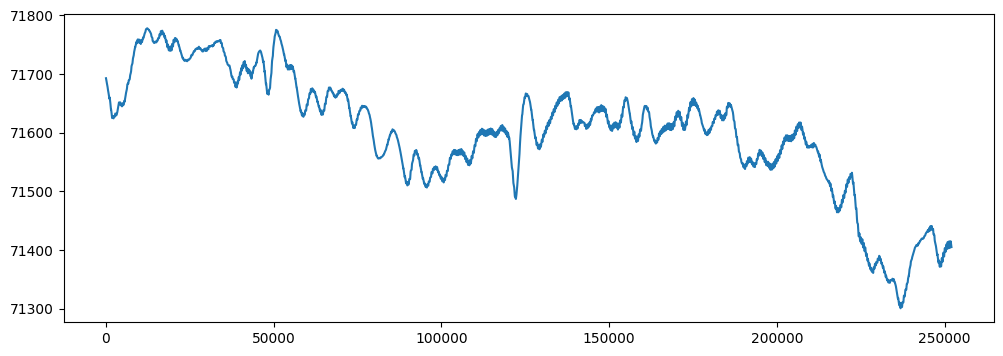

In [78]:
import numpy as np

# Apply a moving average to smooth the signal
window_size = 2000# Adjust the window size as needed
smoothed_data = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Visualize the smoothed data
plt.figure(figsize=(12,4))
plt.plot(smoothed_data)
plt.show()


[-23.96154038 -28.60474896 -32.15152035 ...  -6.81170364  -7.97859257
 -10.51675236]


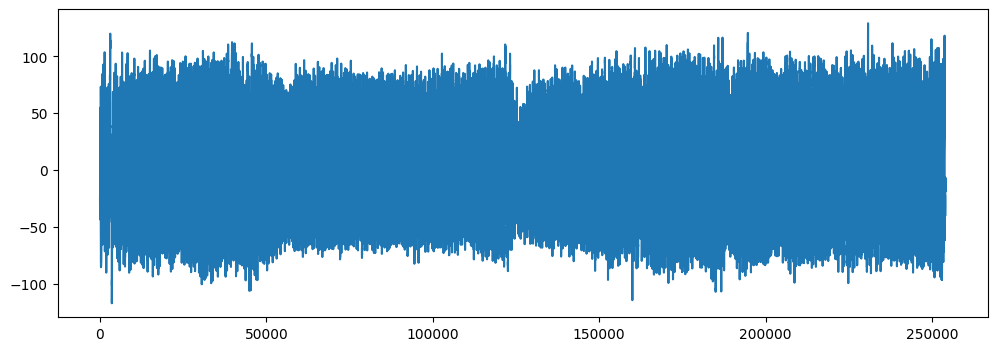

In [72]:
from scipy.signal import butter, filtfilt

# Define a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    print(y)
    return y

# Apply the bandpass filter (set low and high cutoff frequencies based on heart rate)
lowcut = 0.05  # low frequency cutoff in Hz (about 30 bpm)
highcut = 15 # high frequency cutoff in Hz (about 240 bpm)
fs = 100.0  # sampling frequency of the data in Hz 

filtered_data = bandpass_filter(data, lowcut, highcut, fs)

# Visualize the filtered data
plt.figure(figsize=(12,4))
plt.plot(filtered_data)
plt.show()




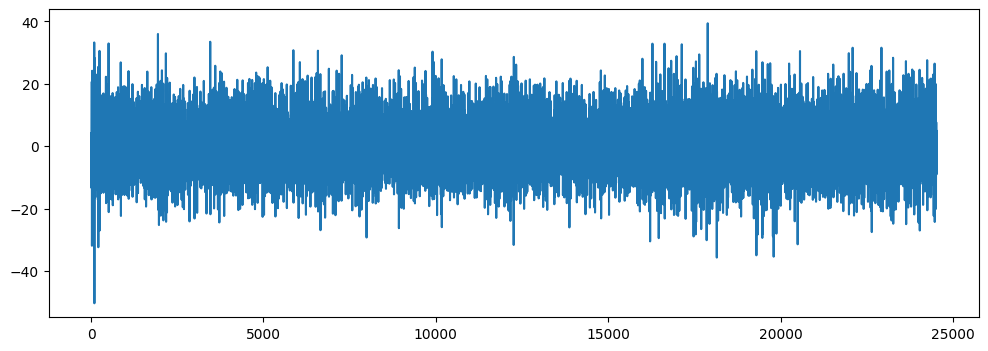

In [24]:
# Downsample the data by taking every nth point
downsample_factor = 10# Increase to reduce density more
downsampled_data = filtered_data[::downsample_factor]

# Visualize the downsampled data
plt.figure(figsize=(12,4))
plt.plot(downsampled_data)
plt.show()



In [25]:
# Check the length of the downsampled data
print(f"Length of downsampled data: {len(downsampled_data)}")


Length of downsampled data: 24528


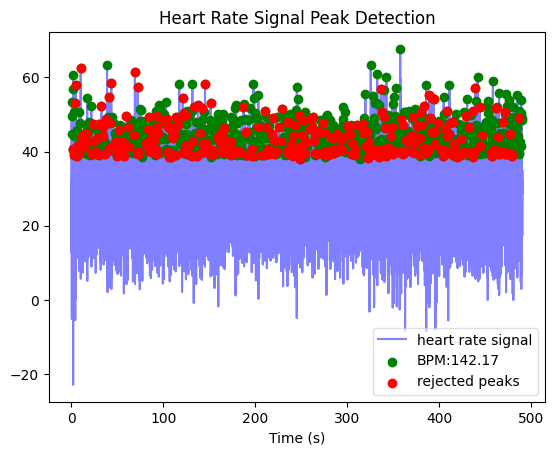

In [26]:
#run the analysis
wd, m = hp.process(filtered_data, sample_rate = 500)
# Visualize the heart rate
hp.plotter(wd, m)

bpm: 142.173890
ibi: 422.018416
sdnn: 168.639643
sdsd: 135.722316
rmssd: 224.518666
pnn20: 0.892231
pnn50: 0.796992
hr_mad: 108.000000
sd1: 158.296035
sd2: 178.568802
s: 88802.561997
sd1/sd2: 0.886471
breathingrate: 0.266667


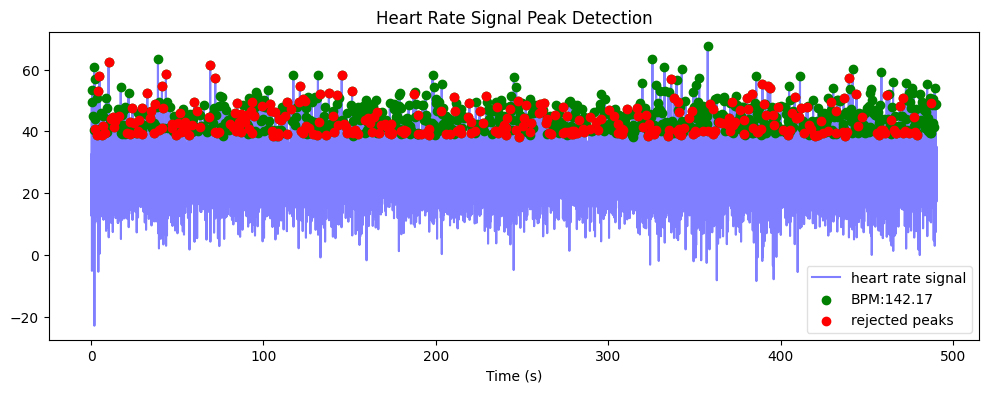

In [27]:
#set large figure
hp.plotter(wd, m)
plt.gcf().set_size_inches(12, 4)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

(60.0, 400.0)

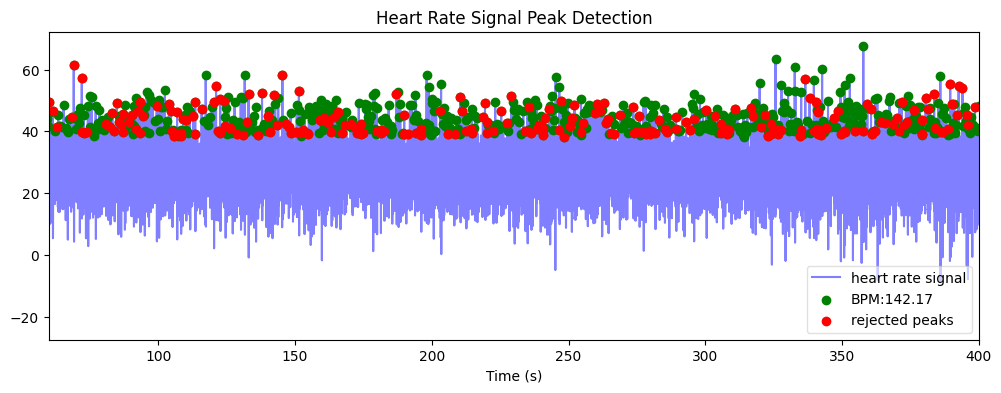

In [28]:
#let's zoom in on a bit
hp.plotter(wd, m)
plt.gcf().set_size_inches(12, 4)
plt.xlim(60, 400)

In [31]:
import heartpy as hp
import numpy as np

# Process the PPG signal with HeartPy
wd, m = hp.process(filtered_data, sample_rate=500)

# Extract peaklist
peaklist = wd['peaklist']
print(peaklist)


[194, 315, 539, 721, 901, 997, 1029, 1269, 1642, 1652, 2038, 2430, 2587, 2805, 3144, 3181, 3352, 3402, 3558, 3936, 4297, 4439, 4572, 4688, 5066, 5223, 5447, 5827, 6241, 6629, 7038, 7175, 7441, 7814, 8203, 8382, 8590, 8690, 8862, 8964, 9132, 9360, 9454, 9723, 9933, 10096, 10447, 10479, 10852, 10984, 11398, 11405, 11989, 12383, 12759, 12937, 13191, 13198, 13574, 13582, 13959, 14118, 14363, 14752, 14899, 14904, 15148, 15345, 15529, 15900, 16303, 16679, 17077, 17458, 17611, 17846, 17998, 18251, 18258, 18588, 18615, 18744, 19018, 19390, 19766, 19775, 20148, 20545, 20555, 20932, 21092, 21685, 22051, 22424, 22798, 23503, 23571, 23652, 23976, 24342, 24495, 24590, 24717, 24738, 25135, 25416, 25509, 25595, 25776, 25850, 26003, 26169, 26180, 26312, 26561, 26711, 26853, 26876, 26913, 27236, 27285, 28064, 28482, 28582, 28849, 29226, 29382, 29590, 29931, 29970, 30288, 30711, 31047, 31527, 31707, 31885, 32039, 32370, 32692, 33050, 33405, 33553, 33766, 34153, 34548, 34678, 34901, 35271, 35430, 35634, 

Segment 1 BPM: 186.80
Segment 2 BPM: 210.08
Segment 3 BPM: 205.48
Segment 4 BPM: 162.87
Segment 5 BPM: 199.73
Segment 6 BPM: 144.09
Segment 7 BPM: 107.07
Segment 8 BPM: 113.81
Segment 9 BPM: 128.98
Segment 10 BPM: 100.54
Segment 11 BPM: 131.23
Segment 12 BPM: 162.69
Segment 13 BPM: 184.05
Segment 14 BPM: 199.20
Segment 15 BPM: 189.39
Segment 16 BPM: 134.41
Segment 17 BPM: 137.99
Segment 18 BPM: 128.21
Segment 19 BPM: 132.74
Segment 20 BPM: 132.74
Segment 21 BPM: 161.99
Segment 22 BPM: 148.81
Segment 23 BPM: 119.52
Segment 24 BPM: 96.59
Segment 25 BPM: 95.97
Segment 26 BPM: 82.64
Segment 27 BPM: 86.81
Segment 28 BPM: 92.94
Segment 29 BPM: 95.36
Segment 30 BPM: 95.30
Segment 31 BPM: 111.61
Segment 32 BPM: 106.01
Segment 33 BPM: 120.10
Segment 34 BPM: 143.13
Segment 35 BPM: 197.11
Segment 36 BPM: 200.00
Segment 37 BPM: 194.81
Segment 38 BPM: 196.34
Segment 39 BPM: 174.22
Segment 40 BPM: 154.80
Segment 41 BPM: 155.60
Segment 42 BPM: 137.99
Segment 43 BPM: 146.34
Segment 44 BPM: 132.86
Segm

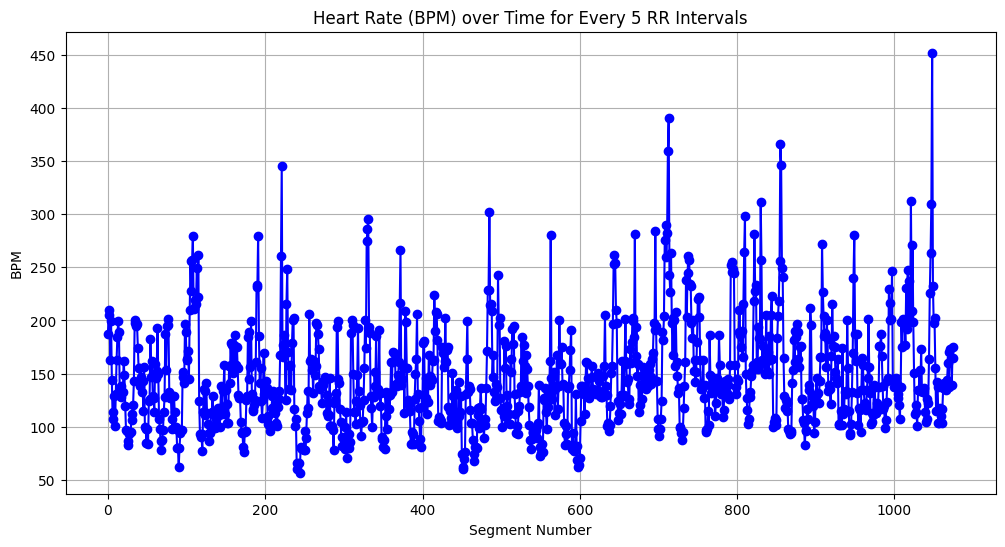

In [44]:
# Calculate RR intervals
working_data = hp.analysis.calc_rr(peaklist, sample_rate=500)

# Extract RR intervals
rr_list = working_data['RR_list']

# Calculate BPM for every 5 RR intervals
bpm_values = []
window_size = 5

for i in range(0, len(rr_list) - window_size + 1):
    rr_segment = rr_list[i:i + window_size]
    rr_diff = np.diff(rr_segment)
    rr_sqdiff = np.power(rr_diff, 2)
    
    # Calculate time-series measures for this segment
    wd_segment, m_segment = hp.analysis.calc_ts_measures(rr_segment, rr_diff, rr_sqdiff, measures={}, working_data={})
    bpm_values.append(m_segment['bpm'])

# Print BPM values for each 5 RR interval segment
for idx, bpm in enumerate(bpm_values):
    print(f"Segment {idx + 1} BPM: {bpm:.2f}")

# Plot BPM values over time
plt.figure(figsize=(12, 6))
plt.plot(bpm_values, marker='o', linestyle='-', color='b')
plt.title('Heart Rate (BPM) over Time for Every 5 RR Intervals')
plt.xlabel('Segment Number')
plt.ylabel('BPM')
plt.grid(True)
plt.show()

/home/imanemisou/.conda/envs/imyenv/lib/python3.8/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/home/imanemisou/.conda/envs/imyenv/lib/python3.8/site-packages/numpy/ma/core.py:5317: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/home/imanemisou/.conda/envs/imyenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Segment 1: Breathing Rate: 0.40 breaths per minute
Segment 2: Breathing Rate: nan breaths per minute
Segment 3: Breathing Rate: 0.41 breaths per minute
Segment 4: Breathing Rate: 0.46 breaths per minute
Segment 5: Breathing Rate: 0.32 breaths per minute
Segment 6: Breathing Rate: nan breaths per minute
Segment 7: Breathing Rate: 0.41 breaths per minute
Segment 8: Breathing Rate: 0.26 breaths per minute
Segment 9: Breathing Rate: 0.32 breaths per minute
Segment 10: Breathing Rate: 0.38 breaths per minute
Segment 11: Breathing Rate: 0.45 breaths per minute
Segment 12: Breathing Rate: 0.31 breaths per minute
Segment 13: Breathing Rate: 0.31 breaths per minute
Segment 14: Breathing Rate: 0.33 breaths per minute
Segment 15: Breathing Rate: 0.62 breaths per minute
Segment 16: Breathing Rate: 0.56 breaths per minute
Segment 17: Breathing Rate: 0.59 breaths per minute
Segment 18: Breathing Rate: 0.41 breaths per minute
Segment 19: Breathing Rate: 0.31 breaths per minute
Segment 20: Breathing R

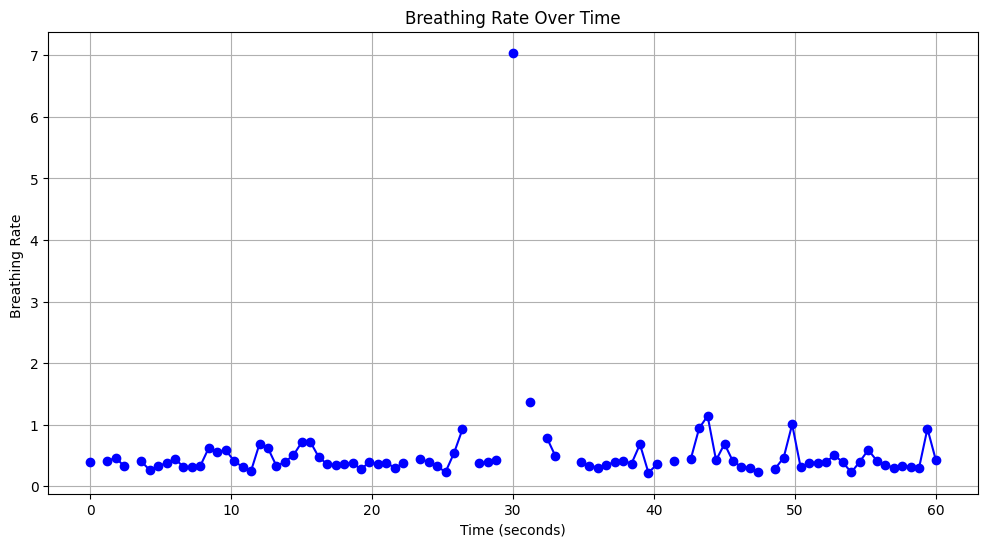

In [73]:
sample_rate = 500  # Sampling rate in Hz
def calculate_breathing_rate(segment, sample_rate):
    # Process the segment with HeartPy
    wd, measures = hp.process(segment, sample_rate)
    
    # Extract breathing rate
    breathing_rate = measures.get('breathingrate', None)
    return breathing_rate
# Parameters
rr_intervals = 5
window_size = int(sample_rate * rr_intervals)  # Number of samples for 5 RR intervals


breathing_rates = []

# Process the PPG signal in segments
for start in range(0, len(filtered_data) - window_size, window_size):
    segment = filtered_data[start:start + window_size]
    
    # Calculate breathing rate for the current segment
    breathing_rate = calculate_breathing_rate(segment, sample_rate)
    breathing_rates.append(breathing_rate)


for i, rate in enumerate(breathing_rates):
    print(f"Segment {i + 1}: Breathing Rate: {rate:.2f} breaths per minute")
# Generate time values for plotting
time_values = np.arange(len(breathing_rates)) * rr_intervals * 60 / sample_rate

# Plot breathing rates
plt.figure(figsize=(12, 6))
plt.plot(time_values, breathing_rates, marker='o', linestyle='-', color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Breathing Rate ')
plt.title('Breathing Rate Over Time')
plt.grid(True)
plt.show()


In [76]:
import numpy as np
import pandas as pd
import heartpy as hp

# Load data
data_dir = "./pulse-transit-time/pulse-transit-time-ppg/1.1.0/csv"
s1_sit_dataset = pd.read_csv(data_dir + "/s1_sit.csv")
ppg_signal = s1_sit_dataset['pleth_1'].values
sample_rate = 500  # Sample rate in Hz

# Parameters for segment processing
segment_width = 60  
segment_overlap = 0.8  

# Process the signal by segments
working_data, measures = hp.process_segmentwise(filtered_data, sample_rate, segment_width, segment_overlap)

# Extract and print measures for each segment
print("Printing BPM and Breathing Rate for each segment:")

# Check the lengths of measures to make sure they match
print(f"Length of BPM measures: {len(measures.get('bpm', []))}")
print(f"Length of Breathing Rate measures: {len(measures.get('breathingrate', []))}")

for i in range(len(measures.get('bpm', []))):
    bpm = measures['bpm'][i] if i < len(measures['bpm']) else np.nan
    breathingrate = measures['breathingrate'][i] if i < len(measures['breathingrate']) else np.nan
    
    print(f"Segment {i + 1} BPM: {bpm:.2f}")
    print(f"Segment {i + 1} Breathing Rate: {breathingrate:.2f} breaths per minute")


Printing BPM and Breathing Rate for each segment:
Length of BPM measures: 39
Length of Breathing Rate measures: 39
Segment 1 BPM: 156.98
Segment 1 Breathing Rate: 0.22 breaths per minute
Segment 2 BPM: 153.16
Segment 2 Breathing Rate: 0.19 breaths per minute
Segment 3 BPM: 154.12
Segment 3 Breathing Rate: 0.23 breaths per minute
Segment 4 BPM: 161.32
Segment 4 Breathing Rate: 0.14 breaths per minute
Segment 5 BPM: 161.39
Segment 5 Breathing Rate: 0.17 breaths per minute
Segment 6 BPM: 161.55
Segment 6 Breathing Rate: 0.28 breaths per minute
Segment 7 BPM: 175.50
Segment 7 Breathing Rate: 0.31 breaths per minute
Segment 8 BPM: 169.27
Segment 8 Breathing Rate: 0.37 breaths per minute
Segment 9 BPM: 159.12
Segment 9 Breathing Rate: 0.20 breaths per minute
Segment 10 BPM: 153.78
Segment 10 Breathing Rate: 0.09 breaths per minute
Segment 11 BPM: 151.41
Segment 11 Breathing Rate: 0.29 breaths per minute
Segment 12 BPM: 169.01
Segment 12 Breathing Rate: 0.13 breaths per minute
Segment 13 BPM: